In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model


Read image and corresponding mask

In [2]:
SIZE=512

Read the image

In [3]:
img=cv2.imread(r'D:\UOB_semester\image processing\lab6\membrane\test\0.png', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
print(img.shape)

(512, 512, 3)


In [4]:
#Get image shape ready for the network
img_array = np.expand_dims(img, axis=0)
print(img_array.shape)

(1, 512, 512, 3)


Read the mask

In [5]:
mask=cv2.imread(r'D:\UOB_semester\image processing\lab6\membrane\test\0_predict.png', 1)   #Change 1 to 0 for grey images

mask=cv2.resize(mask,(SIZE, SIZE))
print(mask.shape)


(512, 512, 3)


In [6]:
#mask_array = np.expand_dims(mask, axis=2) #Grayscale image, so let us expand dim to indicate we have 1 channel
mask_array = np.expand_dims(mask, axis=0) #Expand dim along axis 0 to get it to the right shape for the network
print(mask_array.shape)

(1, 512, 512, 3)


In [7]:
img_array = img_array.astype('float32') / 255.  #Scale image pixel values to between 0 and 1
mask_array = mask_array.astype('float32') / 255.  #Mask has values 0, 255 - scale them to 0 and 1.


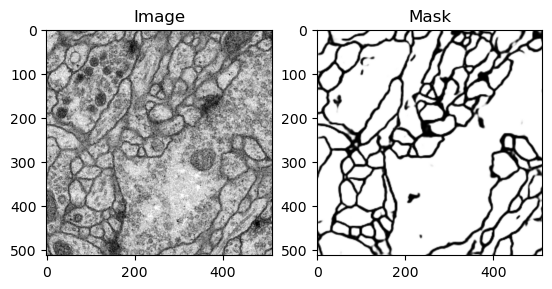

In [8]:
plt.subplot(1,2,1)
plt.imshow(img_array[0,:,:,0], cmap='gray')
plt.title('Image')
plt.subplot(1,2,2)
plt.imshow(mask_array[0,:,:,:])
plt.title('Mask')
plt.show()

In [9]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 256, 256, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 128, 128, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 256)     295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 256)       0

In [17]:
model.fit(img_array, mask_array, epochs=500) 


Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.1611 - accuracy: 0.6891
Epoch 2/500
1/1 [==============================] - 3s 3s/step - loss: 0.1605 - accuracy: 0.6889
Epoch 3/500
1/1 [==============================] - 3s 3s/step - loss: 0.1619 - accuracy: 0.7166
Epoch 4/500
1/1 [==============================] - 3s 3s/step - loss: 0.1555 - accuracy: 0.6985
Epoch 5/500
1/1 [==============================] - 3s 3s/step - loss: 0.1565 - accuracy: 0.6888
Epoch 6/500
1/1 [==============================] - 3s 3s/step - loss: 0.1578 - accuracy: 0.7111
Epoch 7/500
1/1 [==============================] - 3s 3s/step - loss: 0.1522 - accuracy: 0.6934
Epoch 8/500
1/1 [==============================] - 3s 3s/step - loss: 0.1524 - accuracy: 0.6911
Epoch 9/500
1/1 [==============================] - 3s 3s/step - loss: 0.1533 - accuracy: 0.7106
Epoch 10/500
1/1 [==============================] - 3s 3s/step - loss: 0.1507 - accuracy: 0.6864
Epoch 11/500
1/1 [=====================

1/1 [==============================] - 3s 3s/step - loss: 0.1225 - accuracy: 0.6617
Epoch 86/500
1/1 [==============================] - 3s 3s/step - loss: 0.1214 - accuracy: 0.6702
Epoch 87/500
1/1 [==============================] - 3s 3s/step - loss: 0.1208 - accuracy: 0.6731
Epoch 88/500
1/1 [==============================] - 3s 3s/step - loss: 0.1206 - accuracy: 0.6714
Epoch 89/500
1/1 [==============================] - 3s 3s/step - loss: 0.1211 - accuracy: 0.6691
Epoch 90/500
1/1 [==============================] - 2s 2s/step - loss: 0.1217 - accuracy: 0.6680
Epoch 91/500
1/1 [==============================] - 3s 3s/step - loss: 0.1215 - accuracy: 0.6766
Epoch 92/500
1/1 [==============================] - 3s 3s/step - loss: 0.1215 - accuracy: 0.6732
Epoch 93/500
1/1 [==============================] - 3s 3s/step - loss: 0.1208 - accuracy: 0.6766
Epoch 94/500
1/1 [==============================] - 3s 3s/step - loss: 0.1202 - accuracy: 0.6741
Epoch 95/500
1/1 [=========================

1/1 [==============================] - 3s 3s/step - loss: 0.1159 - accuracy: 0.7123
Epoch 169/500
1/1 [==============================] - 3s 3s/step - loss: 0.1161 - accuracy: 0.7139
Epoch 170/500
1/1 [==============================] - 3s 3s/step - loss: 0.1160 - accuracy: 0.7098
Epoch 171/500
1/1 [==============================] - 3s 3s/step - loss: 0.1155 - accuracy: 0.7135
Epoch 172/500
1/1 [==============================] - 3s 3s/step - loss: 0.1152 - accuracy: 0.7127
Epoch 173/500
1/1 [==============================] - 3s 3s/step - loss: 0.1150 - accuracy: 0.7134
Epoch 174/500
1/1 [==============================] - 3s 3s/step - loss: 0.1152 - accuracy: 0.7132
Epoch 175/500
1/1 [==============================] - 3s 3s/step - loss: 0.1155 - accuracy: 0.7090
Epoch 176/500
1/1 [==============================] - 3s 3s/step - loss: 0.1156 - accuracy: 0.7123
Epoch 177/500
1/1 [==============================] - 3s 3s/step - loss: 0.1157 - accuracy: 0.7088
Epoch 178/500
1/1 [===============

1/1 [==============================] - 3s 3s/step - loss: 0.1137 - accuracy: 0.6739
Epoch 252/500
1/1 [==============================] - 3s 3s/step - loss: 0.1135 - accuracy: 0.6818
Epoch 253/500
1/1 [==============================] - 3s 3s/step - loss: 0.1133 - accuracy: 0.6751
Epoch 254/500
1/1 [==============================] - 3s 3s/step - loss: 0.1133 - accuracy: 0.6743
Epoch 255/500
1/1 [==============================] - 3s 3s/step - loss: 0.1134 - accuracy: 0.6816
Epoch 256/500
1/1 [==============================] - 3s 3s/step - loss: 0.1134 - accuracy: 0.6780
Epoch 257/500
1/1 [==============================] - 3s 3s/step - loss: 0.1135 - accuracy: 0.6896
Epoch 258/500
1/1 [==============================] - 4s 4s/step - loss: 0.1136 - accuracy: 0.6808
Epoch 259/500
1/1 [==============================] - 3s 3s/step - loss: 0.1137 - accuracy: 0.6915
Epoch 260/500
1/1 [==============================] - 3s 3s/step - loss: 0.1137 - accuracy: 0.6798
Epoch 261/500
1/1 [===============

1/1 [==============================] - 3s 3s/step - loss: 0.1162 - accuracy: 0.6779
Epoch 335/500
1/1 [==============================] - 3s 3s/step - loss: 0.1186 - accuracy: 0.7273
Epoch 336/500
1/1 [==============================] - 3s 3s/step - loss: 0.1205 - accuracy: 0.6681
Epoch 337/500
1/1 [==============================] - 3s 3s/step - loss: 0.1153 - accuracy: 0.7219
Epoch 338/500
1/1 [==============================] - 3s 3s/step - loss: 0.1154 - accuracy: 0.7220
Epoch 339/500
1/1 [==============================] - 3s 3s/step - loss: 0.1235 - accuracy: 0.6501
Epoch 340/500
1/1 [==============================] - 3s 3s/step - loss: 0.1163 - accuracy: 0.7067
Epoch 341/500
1/1 [==============================] - 3s 3s/step - loss: 0.1290 - accuracy: 0.7233
Epoch 342/500
1/1 [==============================] - 3s 3s/step - loss: 0.2174 - accuracy: 0.5137
Epoch 343/500
1/1 [==============================] - 3s 3s/step - loss: 0.2213 - accuracy: 0.7526
Epoch 344/500
1/1 [===============

1/1 [==============================] - 3s 3s/step - loss: 0.1526 - accuracy: 0.6284
Epoch 418/500
1/1 [==============================] - 3s 3s/step - loss: 0.1517 - accuracy: 0.6342
Epoch 419/500
1/1 [==============================] - 3s 3s/step - loss: 0.1506 - accuracy: 0.6237
Epoch 420/500
1/1 [==============================] - 3s 3s/step - loss: 0.1491 - accuracy: 0.6275
Epoch 421/500
1/1 [==============================] - 3s 3s/step - loss: 0.1476 - accuracy: 0.6169
Epoch 422/500
1/1 [==============================] - 3s 3s/step - loss: 0.1460 - accuracy: 0.6207
Epoch 423/500
1/1 [==============================] - 3s 3s/step - loss: 0.1452 - accuracy: 0.6347
Epoch 424/500
1/1 [==============================] - 3s 3s/step - loss: 0.1437 - accuracy: 0.6321
Epoch 425/500
1/1 [==============================] - 3s 3s/step - loss: 0.1426 - accuracy: 0.6208
Epoch 426/500
1/1 [==============================] - 3s 3s/step - loss: 0.1418 - accuracy: 0.6190
Epoch 427/500
1/1 [===============

1/1 [==============================] - 3s 3s/step - loss: 0.1174 - accuracy: 0.4336


In [18]:
pred = model.predict(img_array)



1/1 [==============================] - 0s 476ms/step


In [19]:
print(pred.shape)
print(pred.max())

(1, 512, 512, 3)
1.0


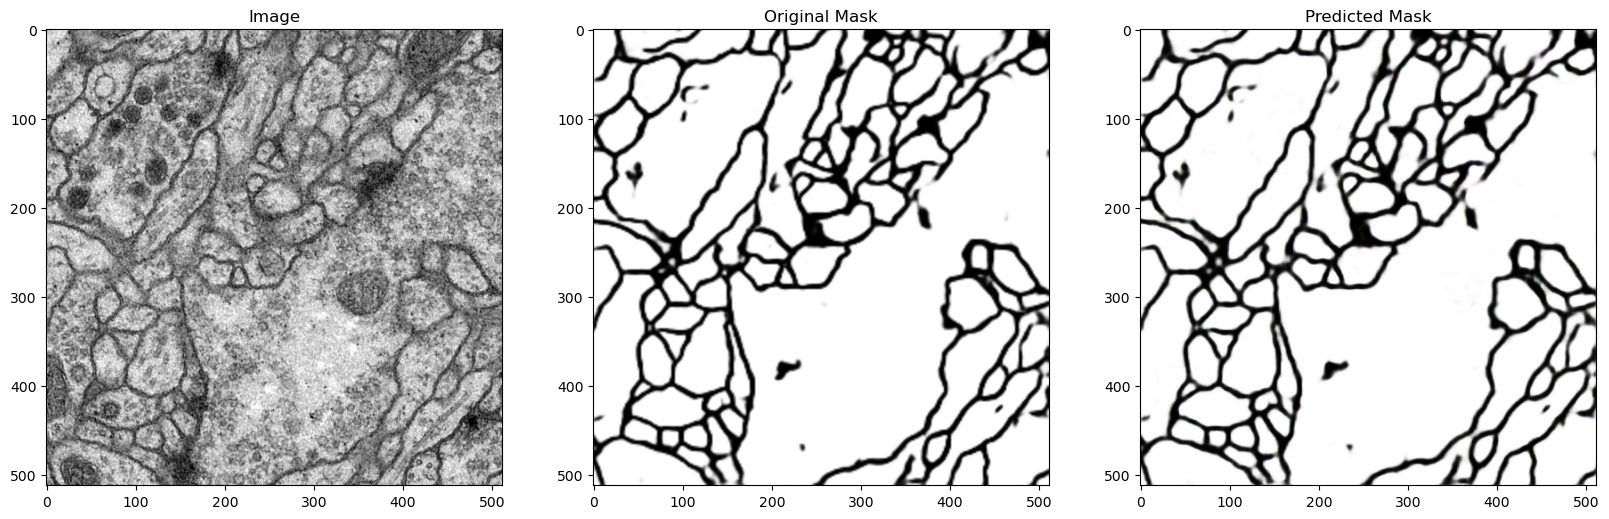

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Image')
plt.subplot(1,3,2)
plt.imshow(mask)
plt.title('Original Mask')
plt.subplot(1,3,3)
plt.imshow(pred[0,:,:,:])
plt.title('Predicted Mask')
plt.show()

In [40]:
#evaluation 
# DICE

import numpy as np

def dice_coefficient(prediction, ground_truth):
    intersection = np.sum(prediction * ground_truth) * 2.0
    dice = intersection / (np.sum(prediction) + np.sum(ground_truth))
    return dice


In [41]:
dice_coefficient(pred,mask)

1.9037225561660938

In [42]:
def jaccard_distance(pred_mask, true_mask):
    intersection = np.logical_and(pred_mask, true_mask)
    union = np.logical_or(pred_mask, true_mask)
    
    iou = np.sum(intersection) / np.sum(union)
    jaccard_distance = 1.0 - iou
    
    return jaccard_distance

In [43]:
jaccard_distance(pred,mask)

0.026897430419921875